In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

In [4]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("sample_submission_file.csv")

data.head()

,ID,Target,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,1,-1.585,Medium,0.602,-3.307,0.170,-0.187,0.896,0.977,...,Cat1,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,1,2.573,Medium,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,...,Cat2,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0,0.106,Medium,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,...,Cat1,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,0,-1.997,High,-1.203,1.347,0.588,0.372,1.846,-0.986,...,Cat1,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,1,-1.900,Medium,0.571,-1.348,1.335,0.000,-1.125,2.419,...,Cat2,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589


In [5]:
# LABEL ENCODING IF NEEDED

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['feature-2'] = label_encoder.fit_transform(data['feature-2'])
test['feature-2'] = label_encoder.fit_transform(test['feature-2'])

In [6]:
data.head()

,ID,Target,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,...,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,1,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,...,Cat1,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,1,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,...,Cat2,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,...,Cat1,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,0,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,...,Cat1,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,1,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,...,Cat2,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589


In [7]:
X = data.drop(['Target'], axis=1)
y = data.loc[:, 'Target']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Target, dtype: int64

In [8]:
# dropping redudant feature

X = X.drop(['feature-11'], axis=1)
test = test.drop(['feature-11'], axis=1)
X.head()

,ID,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20
0,1,-1.585,2,0.602,-3.307,0.170,-0.187,0.896,0.977,-1.203,5.207,-1.983,0.637,3.381,2.477,2.813,-1.032,0.445,0.534,2.477
1,2,2.573,2,-0.317,-0.137,-1.535,-0.272,-0.649,0.782,0.896,0.441,2.094,1.372,0.281,-0.700,0.194,3.439,2.618,0.492,-0.700
2,3,0.106,2,-1.286,-0.055,-1.103,-0.491,-0.133,-0.990,-0.883,-0.917,0.158,0.193,0.413,1.581,-0.114,0.619,0.233,-0.859,1.581
3,4,-1.997,0,-1.203,1.347,0.588,0.372,1.846,-0.986,-1.897,-3.308,-1.365,-0.992,-1.348,-2.621,1.393,-0.152,-0.660,-0.738,-2.621
4,5,-1.900,2,0.571,-1.348,1.335,0.000,-1.125,2.419,0.524,2.222,-1.430,0.383,-1.121,-2.589,0.623,0.338,-1.540,-1.187,-2.589


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

test_data = sc.transform(test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.8408333333333333

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.8420833333333333

In [44]:
parasm = model.get_params()
parasm

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train_sc, y_train)
accuracy_score(model2.predict(X_test_sc), y_test)

0.9179166666666667

In [50]:
parasm = model2.get_params()
parasm

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(bootstrap=True)
model2.fit(X_train_sc, y_train)
accuracy_score(model2.predict(X_test_sc), y_test)

0.9175

In [13]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(bootstrap=False)
model2.fit(X_train_sc, y_train)
accuracy_score(model2.predict(X_test_sc), y_test)

0.9270833333333334

In [ ]:
# False is better

In [53]:
import matplotlib.pyplot as plt

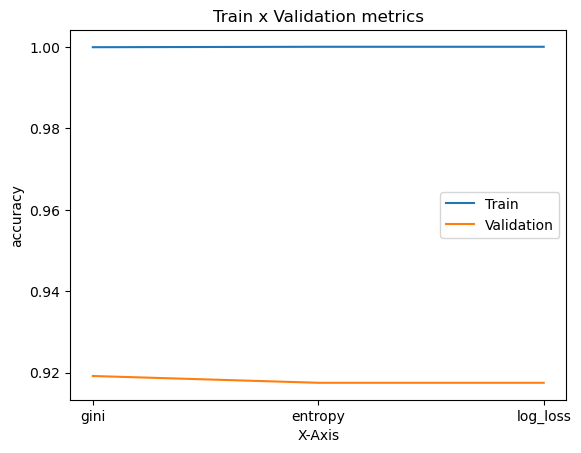

In [56]:
cri = ['gini', 'entropy', 'log_loss']

accuracy_list_train = []
accuracy_list_test = []

for i in cri:
    model = RandomForestClassifier(criterion=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(cri)),labels=cri)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# gini is the better parameter

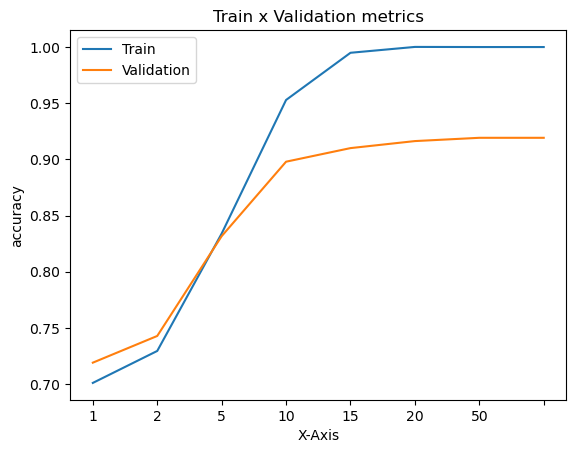

In [57]:
max_d = [1, 2, 5, 10, 15, 20, 50, None]

accuracy_list_train = []
accuracy_list_test = []

for i in max_d:
    model = RandomForestClassifier(max_depth=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_d)),labels=max_d)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# best value is 5 or 10

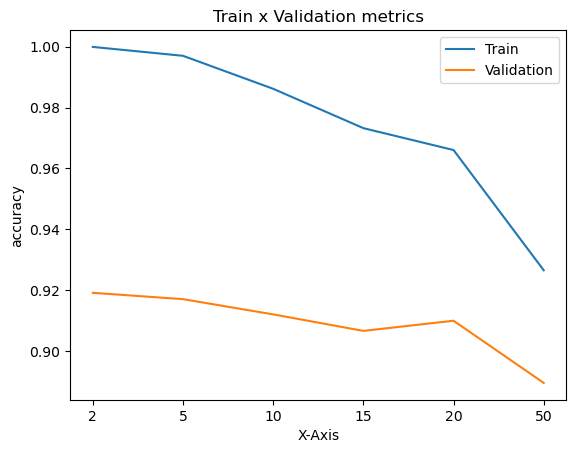

In [60]:
max_s = [2, 5, 10, 15, 20, 50]

accuracy_list_train = []
accuracy_list_test = []

for i in max_s:
    model = RandomForestClassifier(min_samples_split=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_s)),labels=max_s)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# best value is 20  ro 2

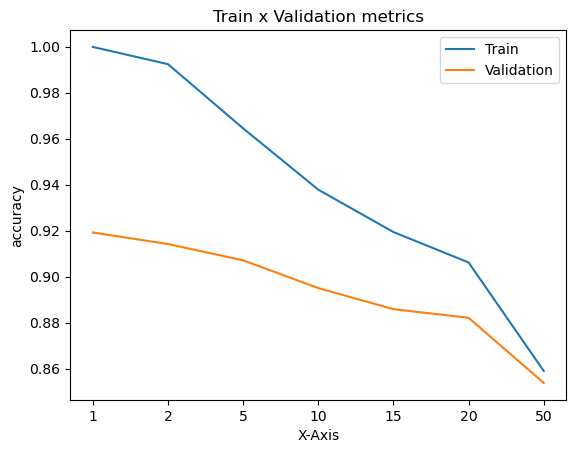

In [61]:
max_f = [1, 2, 5, 10, 15, 20, 50]

accuracy_list_train = []
accuracy_list_test = []

for i in max_f:
    model = RandomForestClassifier(min_samples_leaf=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_f)),labels=max_f)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# best valueis 20 or 10 or2

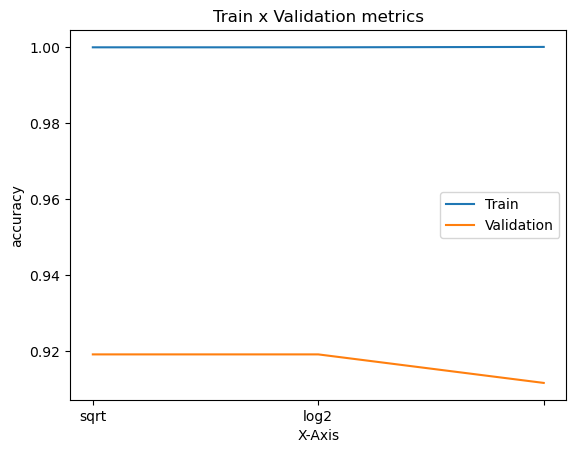

In [62]:
max_f = ['sqrt', 'log2', None]

accuracy_list_train = []
accuracy_list_test = []

for i in max_f:
    model = RandomForestClassifier(max_features=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_f)),labels=max_f)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# log2 or sqrt

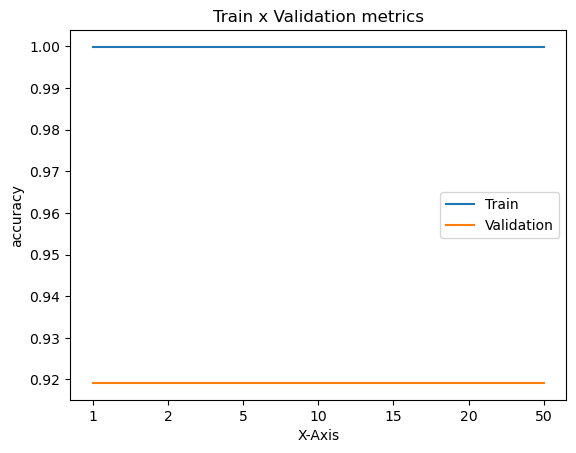

In [63]:
nj = [1, 2, 5, 10, 15, 20, 50]

accuracy_list_train = []
accuracy_list_test = []

for i in nj:
    model = RandomForestClassifier(n_jobs=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(nj)),labels=nj)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# doesnt affect model

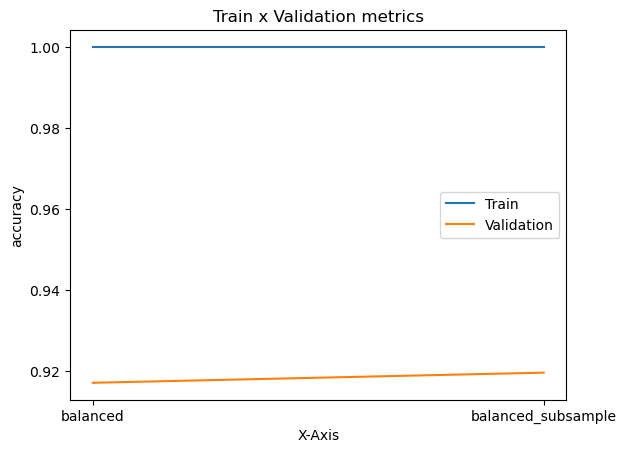

In [64]:
cw = ["balanced", 'balanced_subsample']

accuracy_list_train = []
accuracy_list_test = []

for i in cw:
    model = RandomForestClassifier(class_weight=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(cw)),labels=cw)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# balanced_subsample is better 

In [22]:
final_model1 = RandomForestClassifier(bootstrap=False,
    criterion='gini',
    max_depth=10,
    min_samples_split = 2,
    min_samples_leaf = 2,
    max_features = 'log2',
    n_jobs = 1,
    class_weight = 'balanced_subsample')

In [23]:
final_model1.fit(X_train_sc, y_train)
accuracy_score(final_model1.predict(X_test_sc), y_test)

0.91375

In [16]:
ids = ss.loc[:, 'ID']
pred1 = final_model1.predict(test_data)
ss.head()

,ID,Target
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


In [18]:
df = pd.DataFrame({"ID": ids,
                  "Target": pred1})
df.head()

,ID,Target
0,1,0
1,2,1
2,3,1
3,4,2
4,5,1


In [19]:
df.to_csv("sumbission1.csv", index=False)

In [24]:
from sklearn.neural_network import MLPClassifier

modela = MLPClassifier(random_state = 0)
modela.fit(X_train_sc, y_train)
accuracy_score(modela.predict(X_test_sc), y_test)

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9491666666666667

In [25]:
parasm = modela.get_params()
parasm

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


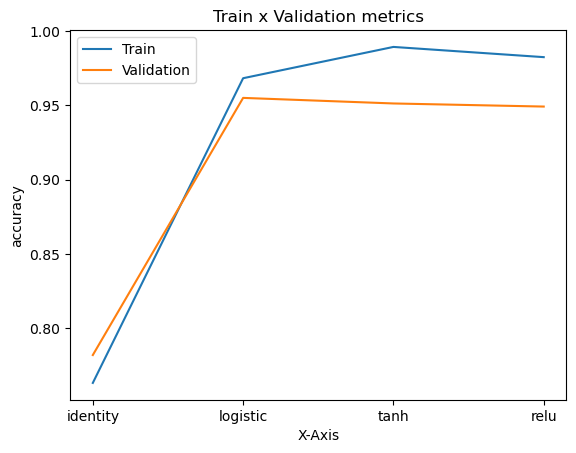

In [93]:
acts = ['identity', 'logistic', 'tanh', 'relu']

accuracy_list_train = []
accuracy_list_test = []

for i in acts:
    model = MLPClassifier(activation=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(acts)),labels=acts)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


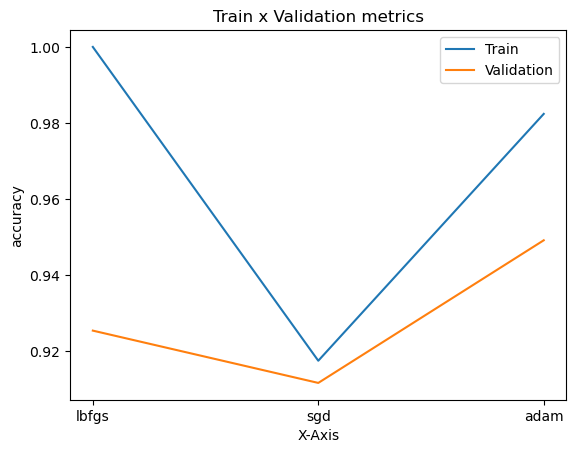

In [94]:
slv = ['lbfgs', 'sgd', 'adam']

accuracy_list_train = []
accuracy_list_test = []

for i in slv:
    model = MLPClassifier(solver=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(slv)),labels=slv)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


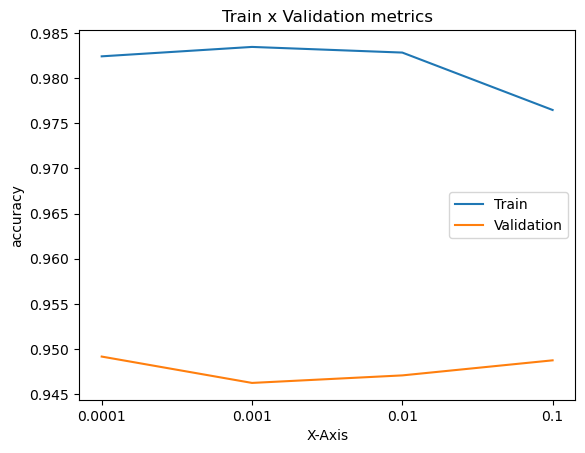

In [96]:
apl = [0.0001, 0.001, 0.01, 0.1]

accuracy_list_train = []
accuracy_list_test = []

for i in apl:
    model = MLPClassifier(alpha=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(apl)),labels=apl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


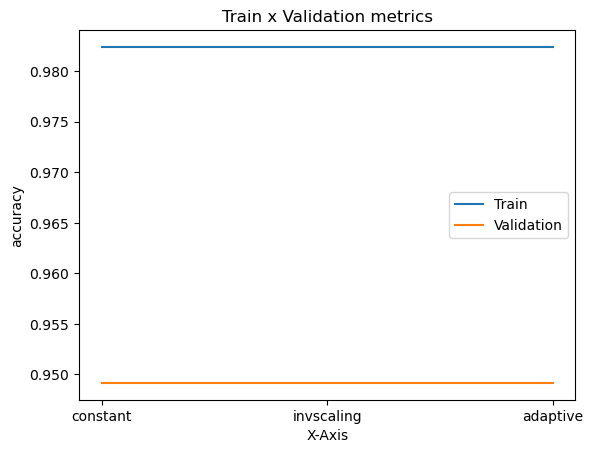

In [98]:
lr = ['constant', 'invscaling', 'adaptive']

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = MLPClassifier(learning_rate=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(lr)),labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


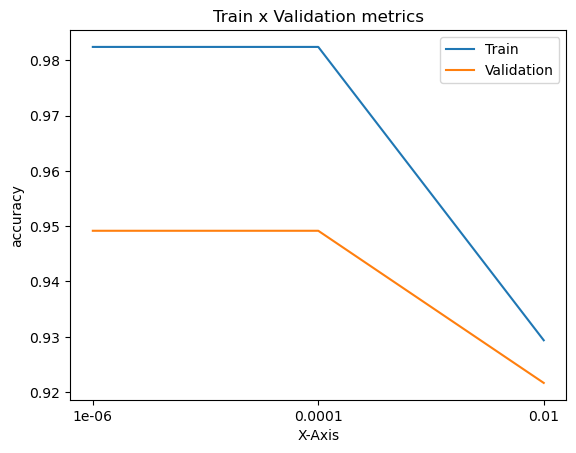

In [100]:
tl = [1e-6, 1e-4, 1e-2,]

accuracy_list_train = []
accuracy_list_test = []

for i in tl:
    model = MLPClassifier(tol=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(tl)),labels=tl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [33]:
final_model2 = MLPClassifier(activation = 'relu',
    solver = 'adam',
    alpha = 0.0001,
    learning_rate = 'constant',
    tol = 1e-4, random_state=0)

In [34]:
final_model2.fit(X_train_sc, y_train)
accuracy_score(final_model2.predict(X_test_sc), y_test)

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9491666666666667

In [36]:
ids = ss.loc[:, 'ID']
pred1 = final_model2.predict(test_data)
ss.head()

,ID,Target
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


In [37]:
df = pd.DataFrame({"ID": ids,
                  "Target": pred1})
df.head()

,ID,Target
0,1,2
1,2,0
2,3,1
3,4,2
4,5,1


In [39]:
df.to_csv("sumbission3.csv", index=False)